In [1]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as py

In [2]:
df = pd.read_csv("All Data.csv")
del df["Unnamed: 0"]
df = df.drop(['GP', 'Team', 'W', 'L', 'division', 'GPR'], axis = 1)
df = df[df["msi_placed"] != -1]
df.head()

,AGT,K,D,KD,CKPM,GSPD,GD15,FB%,FT%,F3T%,...,LNE%,JNG%,WPM,CWPM,WCPM,win_rate,EGR,MLR,year,msi_placed
0,42.7,239,235,1.02,0.85,0.000,0.0,0.00,0.00,0.00,...,0.000,0.000,0.00,0.00,0.00,53.85,0.0,0.0,2015,0
1,35.8,214,269,0.80,0.96,-0.062,-1303.0,0.50,0.36,0.29,...,0.495,0.446,2.21,0.32,0.69,42.86,0.0,0.0,2015,0
2,39.3,80,121,0.66,0.85,0.000,0.0,0.00,0.00,0.00,...,0.000,0.000,0.00,0.00,0.00,16.67,0.0,0.0,2015,0
3,33.9,291,175,1.66,0.98,0.153,867.0,0.43,0.79,0.86,...,0.520,0.506,2.37,0.34,0.82,85.71,0.0,0.0,2015,1
5,36.8,214,263,0.81,0.92,-0.092,-1297.0,0.36,0.43,0.36,...,0.489,0.537,2.47,0.31,0.75,28.57,0.0,0.0,2015,0


In [3]:
"""
Process derived from:
https://www.datacamp.com/community/tutorials/decision-tree-classification-python
"""

feature_cols = list(df)[0:-1]

X = df[feature_cols]
y = df["msi_placed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3, random_state=1)

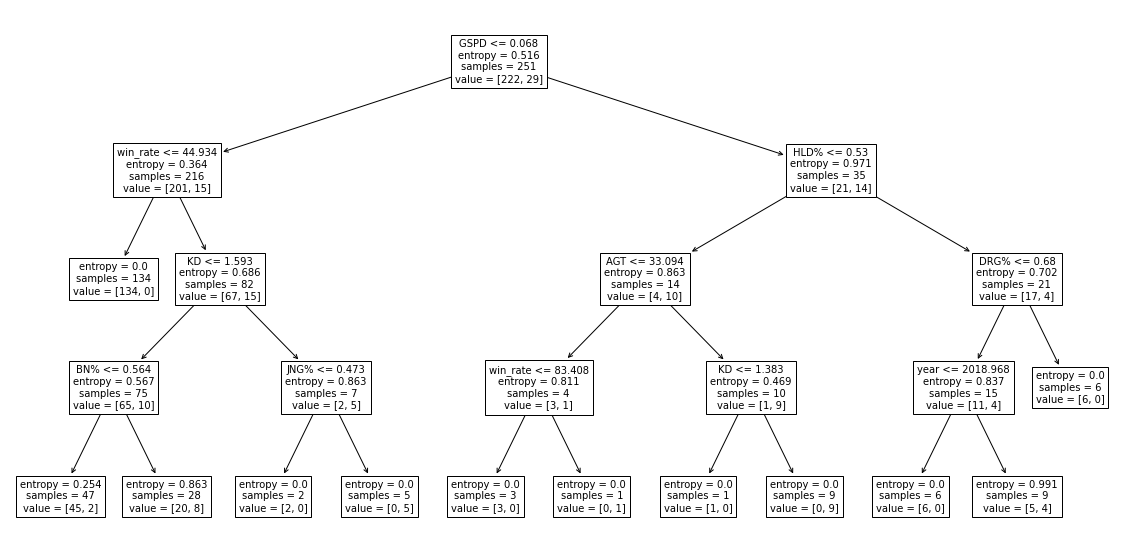

Accuracy: 0.8981481481481481


In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(criterion = "entropy", 
                             splitter = "random",
                             max_depth = 4)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

plt.figure(figsize = (20, 10))
tree.plot_tree(dtc, fontsize = 10, feature_names = feature_cols)
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))